### weight: 혐의 영역의 크기가 절반(8 cells)

dutmap: 1행 1열~1행 8열 All failed SSA, 1행 9열~1행 16열 All failed SSA

weight: 각 행을 절반으로 나눈 모든 영역을 SSA라고 할 때, All failed SSA에 대해서만 자기 자신 제외 서로 neighbor, weight는 1로 부여

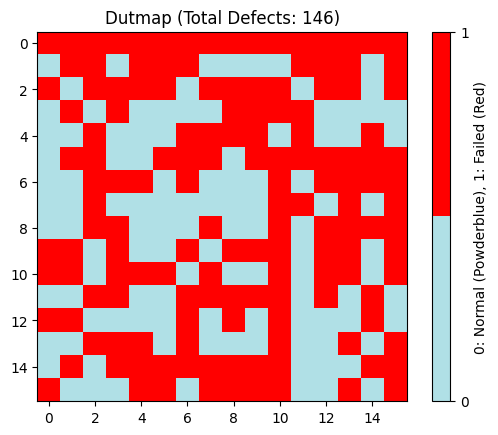

전체 불량 개수: 146


C:\Users\s\AppData\Local\Temp\ipykernel_35460\2006514898.py:55: UserWarning: The weights matrix is not fully connected: 
 There are 242 disconnected components.
 There are 240 islands with ids: 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 

{0: [1, 2, 3, 4, 5, 6, 7],
 1: [0, 2, 3, 4, 5, 6, 7],
 2: [0, 1, 3, 4, 5, 6, 7],
 3: [0, 1, 2, 4, 5, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7],
 5: [0, 1, 2, 3, 4, 6, 7],
 6: [0, 1, 2, 3, 4, 5, 7],
 7: [0, 1, 2, 3, 4, 5, 6],
 8: [9, 10, 11, 12, 13, 14, 15],
 9: [8, 10, 11, 12, 13, 14, 15],
 10: [8, 9, 11, 12, 13, 14, 15],
 11: [8, 9, 10, 12, 13, 14, 15],
 12: [8, 9, 10, 11, 13, 14, 15],
 13: [8, 9, 10, 11, 12, 14, 15],
 14: [8, 9, 10, 11, 12, 13, 15],
 15: [8, 9, 10, 11, 12, 13, 14],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: []

In [13]:
import numpy as np 
from libpysal.weights import W 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 

def dutmap_allfailedssa(p, r, size): 
    dutmap = np.random.choice([0, 1], size=(size, size), p=[1-p, p]) 
    dutmap[r, :] = 1 
    return dutmap 

def dutmap_visualization(dutmap): 
    total_defects = np.sum(dutmap) 
    cmap = ListedColormap(["Powderblue", "Red"]) 
    plt.imshow(dutmap, cmap=cmap, interpolation='nearest') 
    plt.title(f"Dutmap (Total Defects: {total_defects})") 
    plt.colorbar(label='0: Normal (Powderblue), 1: Failed (Red)', ticks=[0, 1]) 
    plt.show() 

    print(f"전체 불량 개수: {total_defects}") 
def weight_allfailedssa_partitioned(dutmap):
    size = dutmap.shape[0]
    neighbors = {}
    weights = {}

    for row in range(size):
        row_start = row * size
        row_end = row_start + size

        partition1 = (row_start, row_start + size // 2) 
        partition2 = (row_start + size // 2, row_end)   

        if np.all(dutmap[row, :size // 2] == 1):
            for i in range(*partition1):
                neighbors[i] = []
                weights[i] = []
                for j in range(*partition1):
                    if i != j:
                        neighbors[i].append(j)
                        weights[i].append(1)

        if np.all(dutmap[row, size // 2:] == 1):
            for i in range(*partition2):
                neighbors[i] = []
                weights[i] = []
                for j in range(*partition2):
                    if i != j:
                        neighbors[i].append(j)
                        weights[i].append(1)

        else:
            for i in range(row_start, row_end):
                neighbors[i] = []
                weights[i] = []

    parameterw = W(neighbors, weights)
    return parameterw

dutmap=dutmap_allfailedssa(p=0.5, r=0, size=16)
dutmap_visualization(dutmap)
parameterw=weight_allfailedssa_partitioned(dutmap)
parameterw.neighbors

### Results

All failed SSA에 속하지 않은 cell들에 대한 weight는 전부 0

속한 cell들은 자기 자신 제외 서로 neighbor, 따라서 weight 1